In [1]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from plotnine import ggplot, aes, geom_smooth, geom_point, geom_boxplot, geom_line

In [2]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

insurance = insurance.dropna()

#print(insurance.head())

print(insurance.describe())
print("\n")
print(len(insurance[insurance['sex'] == 'female']))
print(len(insurance[insurance['smoker'] == 'yes']))
print(insurance.groupby('region').count())


              age         bmi       charges
count  431.000000  431.000000    431.000000
mean    37.960557   30.768898  12297.098118
std     16.363909    6.111362  11876.527128
min     18.000000   15.960000   1131.506600
25%     22.000000   26.357500   2710.444575
50%     34.000000   30.590000   9866.304850
75%     55.000000   35.272500  14510.872600
max     64.000000   49.060000  55135.402090


225
87
           age  sex  bmi  smoker  charges
region                                   
northeast  108  108  108     108      108
northwest   95   95   95      95       95
southeast  125  125  125     125      125
southwest  103  103  103     103      103


C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


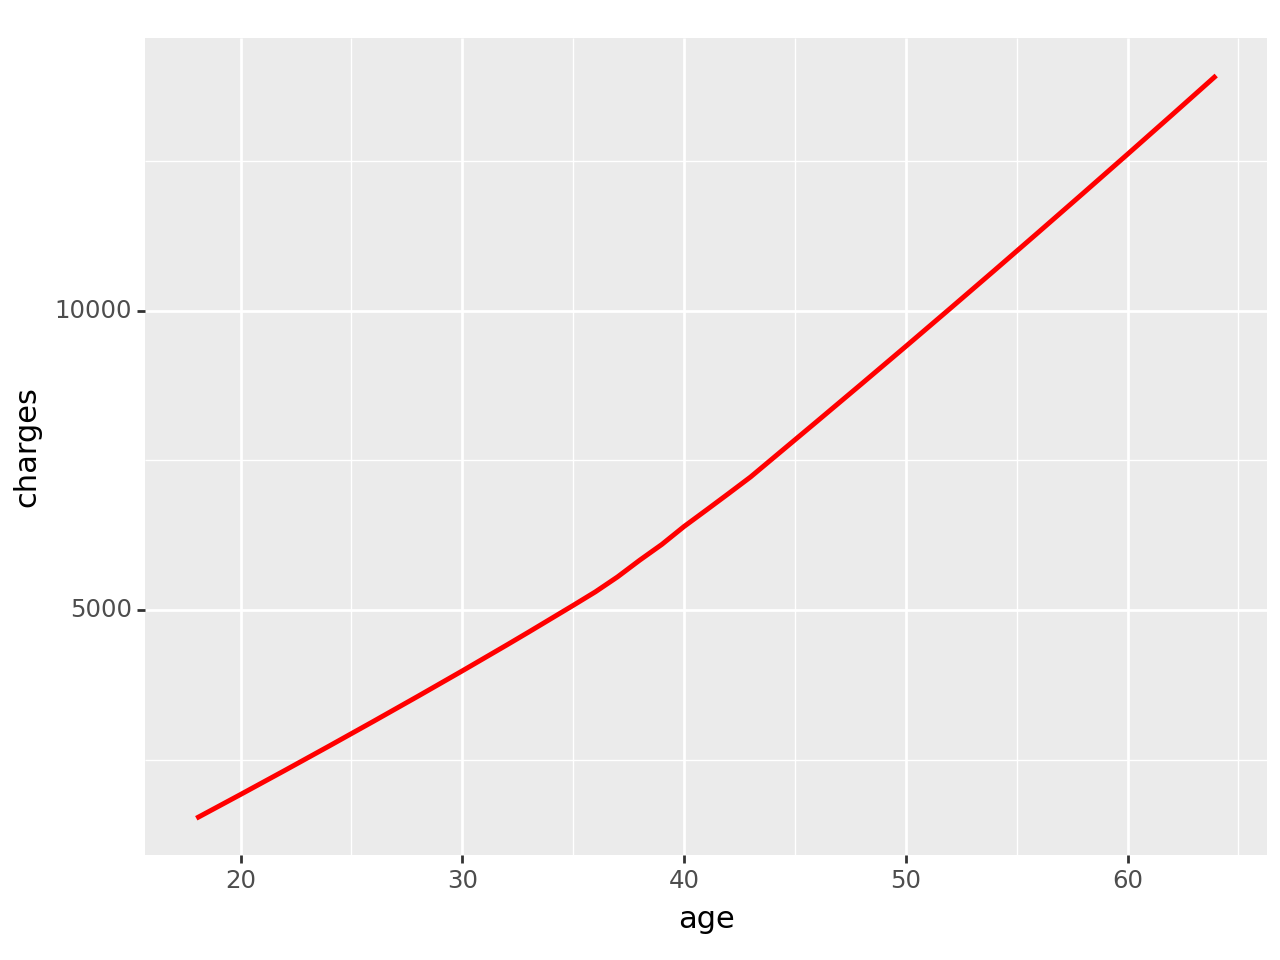

<Figure Size: (640 x 480)>

In [3]:
(ggplot(insurance)
    + geom_smooth(aes(x = 'age', y = 'charges'), color = 'red')
)

On the first plot we can see that the charges go up with the age,however, this is very much expected with any insurance plan.

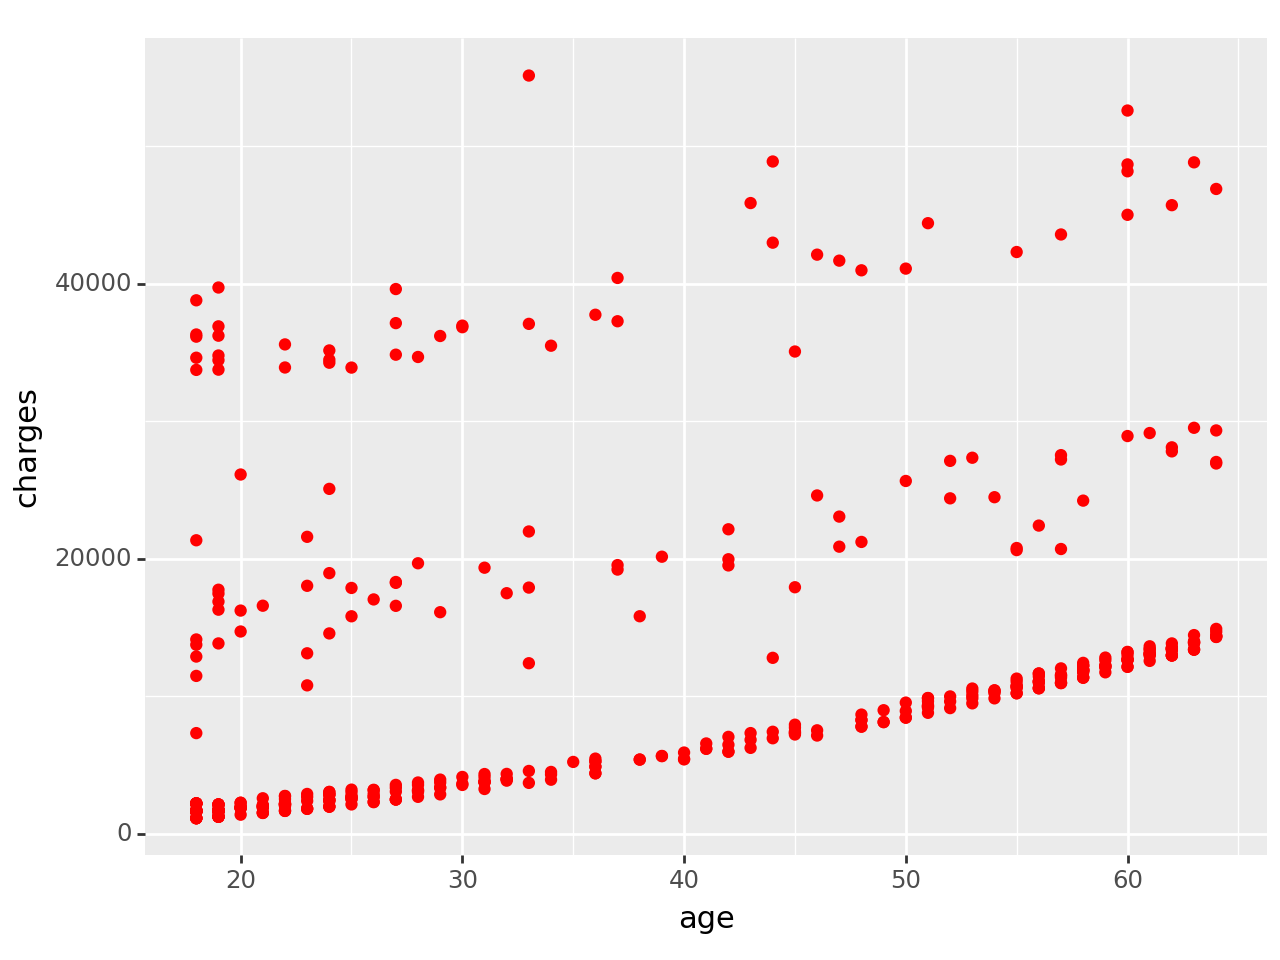

<Figure Size: (640 x 480)>

In [4]:
(ggplot(insurance)
    + geom_point(aes(x = 'age', y = 'charges'), color = 'red')
)

On this second graph we can see that majority of point follow a specific predetermined shape, however, there are two other ranges that go up with age which could indicate that other likely categorical variables play an effect on the charges.

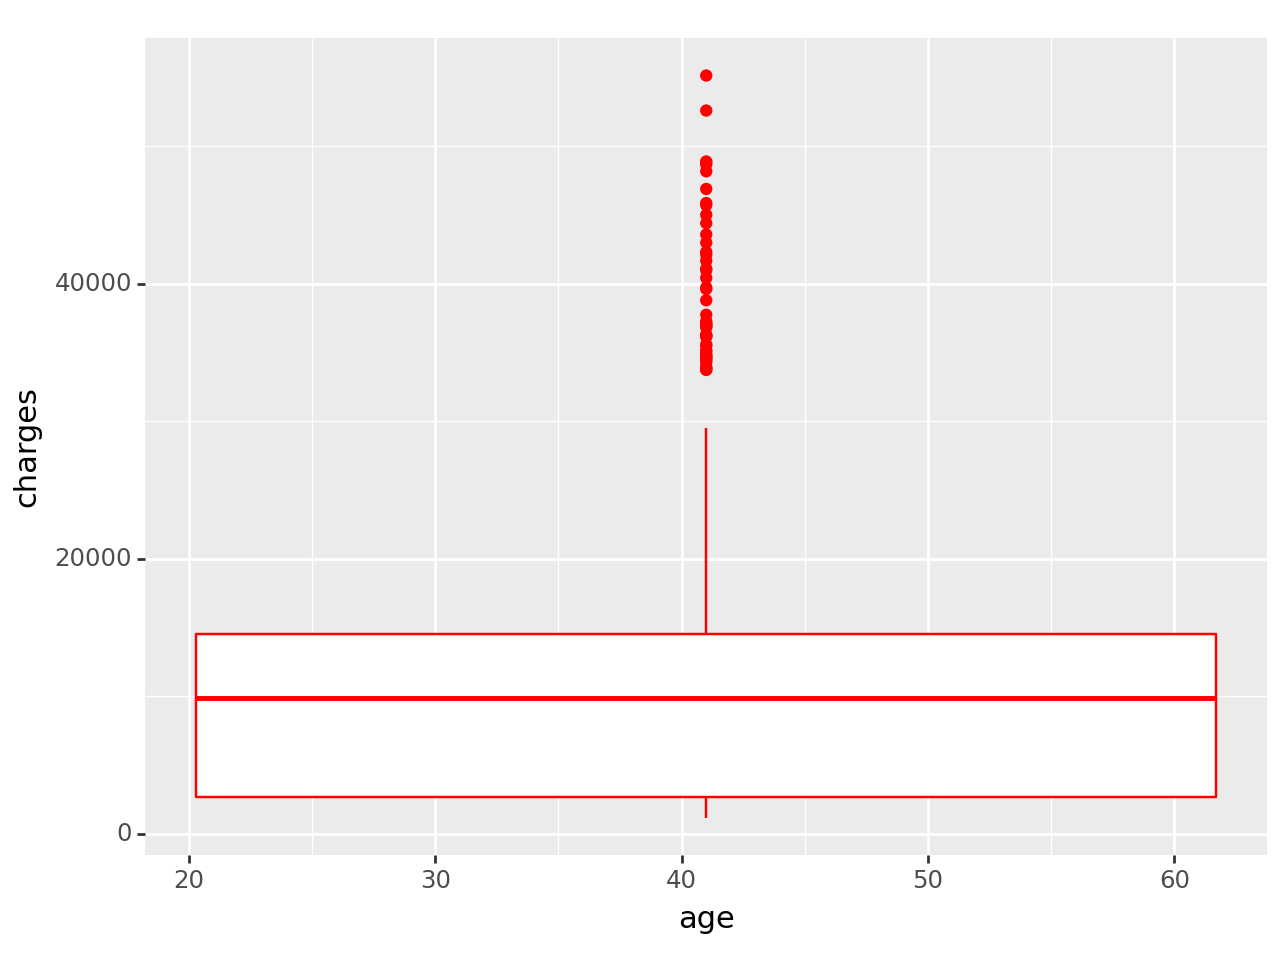

<Figure Size: (640 x 480)>

In [5]:
(ggplot(insurance)
    + geom_boxplot(aes(x = 'age', y = 'charges'), color = 'red')
)

This boxplot confirms that most of the memebrs pay a relatively low charge rate, however, there are many extreme cases where the charges are very high. Due to the amount of these extreme numbers, I don't think it would be appropriate to consider them as outliears.

## Part 2

In [6]:
y = insurance['charges']
X = insurance[['age']]

## Model spec: Linear

lr = LinearRegression()

model1 = lr.fit(X,y)

y_pred = model1.predict(X)

print(model1.coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

[228.79904937]
0.09938105452062707
126739267.91026388


Based on this model it seems that each year of age would increase the charges for the individual by $228, however, this is assuming that the age is the only factor.

In [7]:
y = insurance['charges']
X = insurance[['age' , 'sex']]

X = pd.get_dummies(X, drop_first = True)

## Model spec: Linear

lr = LinearRegression()

model2 = lr.fit(X,y)

y_pred = model2.predict(X)

print(model2.coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

[228.42586236 649.83258997]
0.10012952499706396
126633939.67937087


Based on this model, males would pay an average of $650 more than female for insurance.

In [8]:
y = insurance['charges']
X = insurance[['age' , 'smoker']]

X = pd.get_dummies(X, drop_first = True)

## Model spec: Linear

lr = LinearRegression()

model3 = lr.fit(X,y)

y_pred = model3.predict(X)

print(model3.coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

[  253.14535549 24048.86743795]
0.7603842948069404
33719831.46524373


Based on this model, smokers pay 24,048 more than non smokers, this would explain the tier in our pointplot earlier

Q4. Looking at these models, based on the R2 the second model is a lot better at explaining the data, the MSE also confirms this, however, as the MSE values are very high, they are more difficult to interperet.

## Part 3

In [9]:
y = insurance['charges']
X = insurance[['age' , 'bmi']]

## Model spec: Linear

lr = LinearRegression()

model4 = lr.fit(X,y)

y_pred = model4.predict(X)

print(model4.coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

[216.29721472 283.20380126]
0.12032144234129338
123792439.58129103


These models are very similar, however, since since R2 will get more accurate with more predictor variables, we would have to compare adjusted R2 to get reliable results. It is difficult to draw a conclusion based on these models and just R2 and MSE.

In [10]:
y = insurance['charges']
X = insurance[['age']]
X['age2'] = X['age']**2

## Model spec: Linear

lr = LinearRegression()

model5 = lr.fit(X,y)

y_pred = model5.predict(X)

print(model5.coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

[308.42816984  -1.00150889]
0.09958694669946933
126710293.80956802


C:\Users\tuke-\AppData\Local\Temp\ipykernel_6464\1221755508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Again, we are running into similar issues, however, compared to the last part, this model is less accurate as the r2 is lower and MSE is higher than the previous part.

In [11]:
y = insurance['charges']
X = insurance[['age']]

## Preprocessing One-hot-encode
## Model spec: Polynomial
degree = 4
poly = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly, ['age'])]
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
model6 = my_pipeline.fit(X, y)

y_pred = model6.predict(X)

#print(model6.named_steps['ols'].coef_)

X_4 = X
X_4['predict'] = y_pred

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.10782931453183808
125550389.64569825


C:\Users\tuke-\AppData\Local\Temp\ipykernel_6464\114678143.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


There seems to be barely any change from the previous part.

In [12]:
y = insurance['charges']
X = insurance[['age']]

## Preprocessing One-hot-encode
## Model spec: Polynomial
degree = 12
poly = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly, ['age'])]
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
model7 = my_pipeline.fit(X, y)

y_pred = model7.predict(X)

#print(model7.named_steps['ols'].coef_)

print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.10764575322245173
125576221.24305142


Q5 Out of the models in Pt.3 I would lean towards Q1 as it has the best r2 and MSE, however, out of the age models the best model seems to be Q4. It is hard to say if there could be overfitting and or underfitting going on.

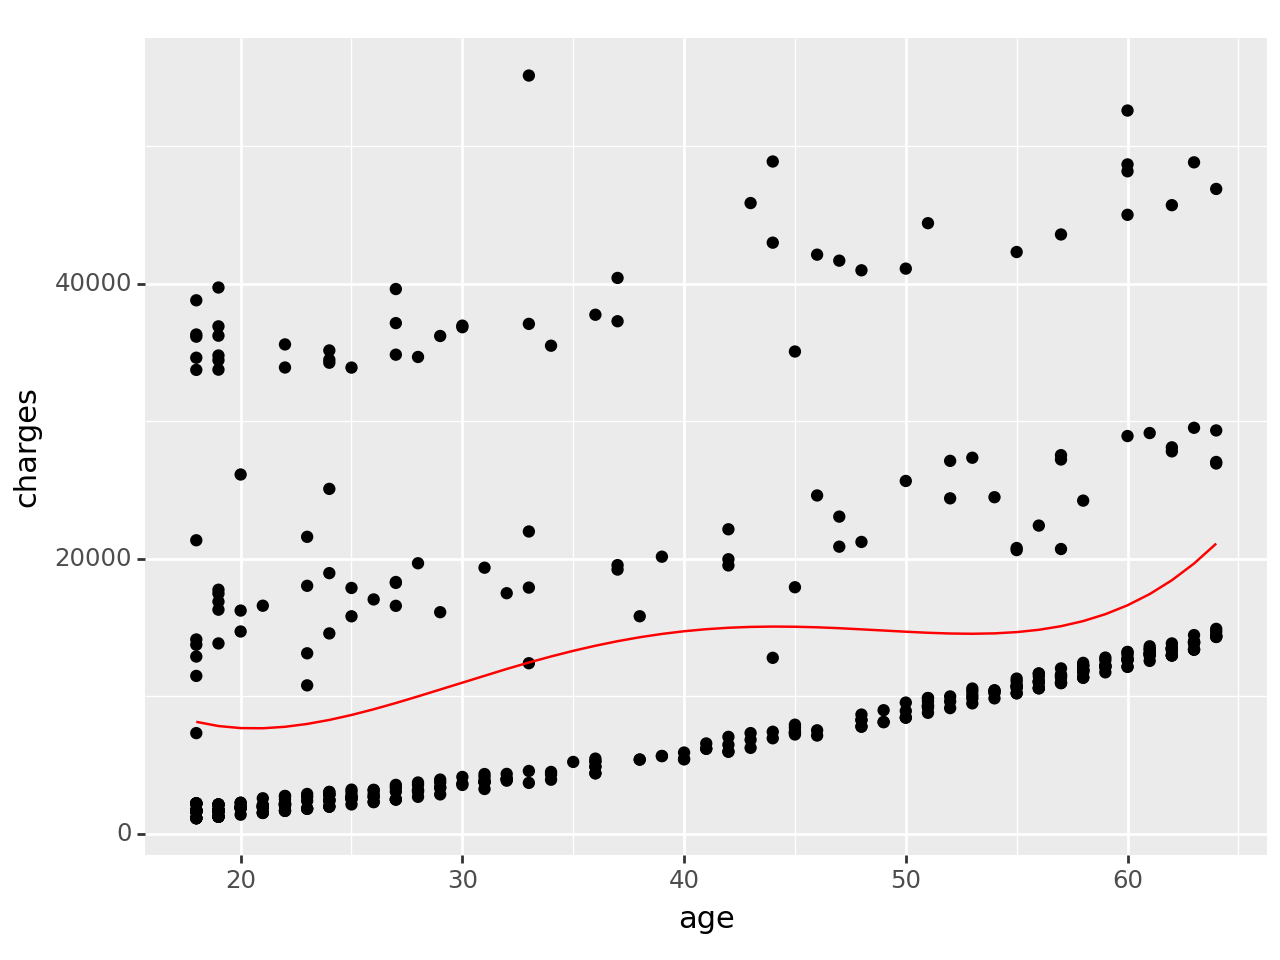

<Figure Size: (640 x 480)>

In [13]:
(ggplot(insurance)
    + geom_point(aes(x = 'age', y = 'charges'))
    + geom_line(X_4, aes(x = 'age', y = 'predict'), color = 'red')
)

It looks like the model might be trying to overfit, as majority of the data is following the pattern at the bottom of the chart.

## Part 4

In [85]:
insurance_new = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

insurance_new = insurance_new.dropna()


In [15]:
y = insurance['charges']
X = insurance[['age']]

## Model spec: Linear

lr = LinearRegression()

model1 = lr.fit(X,y)

y_pred = model1.predict(X)

print(mean_squared_error(y, y_pred))

y = insurance_new['charges']
X = insurance_new[['age']]

y_pred = model1.predict(X)

print(mean_squared_error(y, y_pred))

126739267.91026388
136077136.50195494


In [16]:
y = insurance['charges']
X = insurance[['age' , 'bmi']]

## Model spec: Linear

lr = LinearRegression()

model4 = lr.fit(X,y)

y_pred = model4.predict(X)

print(mean_squared_error(y, y_pred))

y = insurance_new['charges']
X = insurance_new[['age' , 'bmi']]

y_pred = model4.predict(X)

print(mean_squared_error(y, y_pred))

123792439.58129103
132636406.1108129


In [17]:
y = insurance['charges']
X = insurance[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['age_smoker'] = X['age'] * X['smoker_yes']

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

X.drop('smoker_yes', axis = 1, inplace = True)
## Model spec: Linear

lr = LinearRegression()

model4 = lr.fit(X,y)

y_pred = model4.predict(X)

print(mean_squared_error(y, y_pred))

y = insurance_new['charges']
X = insurance_new[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['age_smoker'] = X['age'] * X['smoker_yes']

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

X.drop('smoker_yes', axis = 1, inplace = True)

y_pred = model4.predict(X)

print(mean_squared_error(y, y_pred))

20773858.81047234
24795908.41264334


In [18]:
y = insurance['charges']
X = insurance[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['age_smoker'] = X['age'] * X['smoker_yes']

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

## Model spec: Linear

lr = LinearRegression()

model4 = lr.fit(X,y)

y_pred = model4.predict(X)

print(mean_squared_error(y, y_pred))

y = insurance_new['charges']
X = insurance_new[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['age_smoker'] = X['age'] * X['smoker_yes']

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

y_pred = model4.predict(X)

residual = (y - y_pred)

X['resid'] = residual

print(mean_squared_error(y, y_pred))

18674284.77468444
21786256.866852645


Based on this the last model is the best as the MSE is the lowest. This makes sense as we have more predictor variables

C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


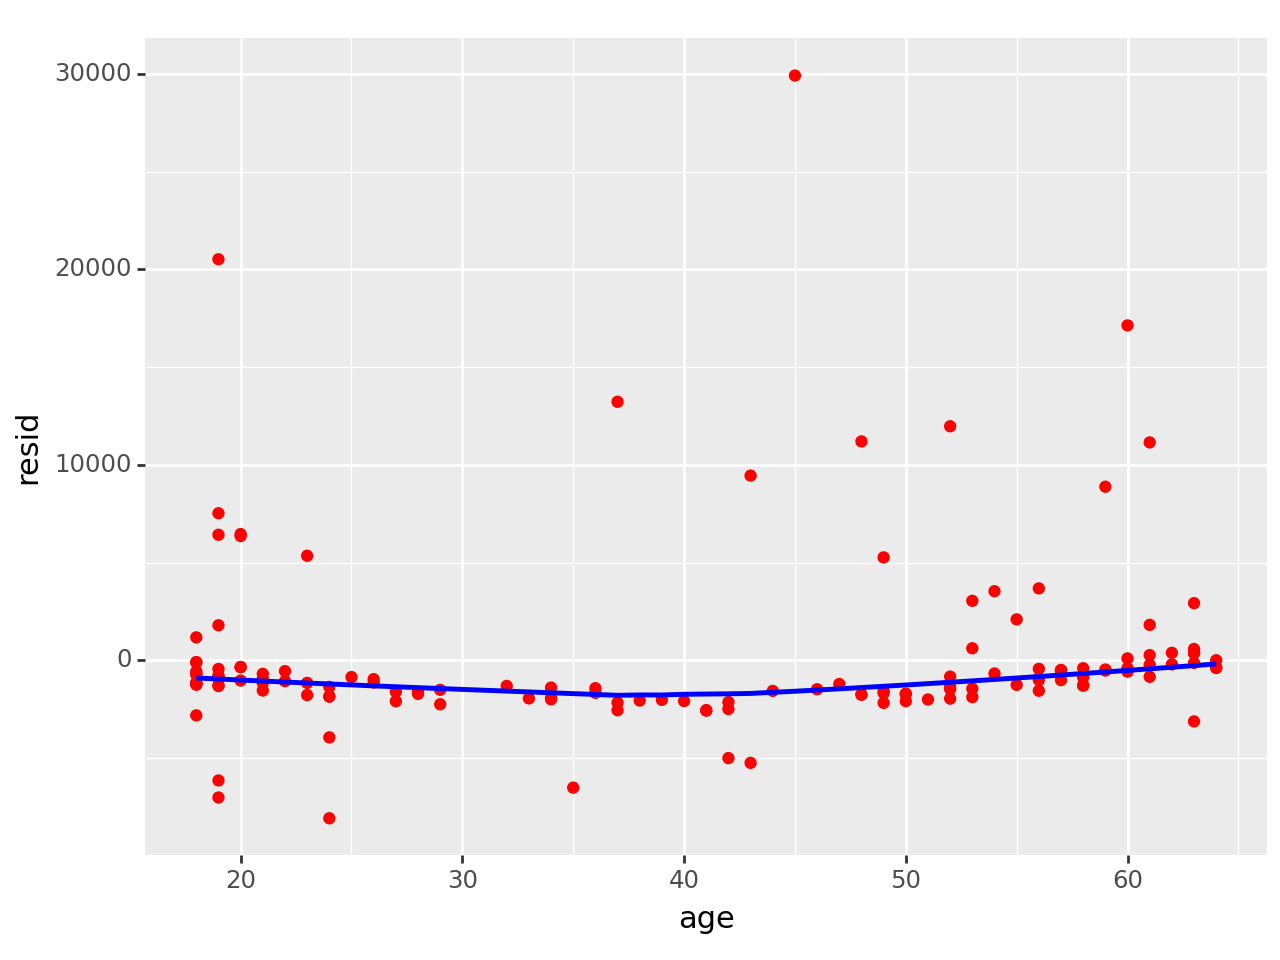

<Figure Size: (640 x 480)>

In [19]:
(ggplot(X)
    + geom_point(aes(x = 'age', y = 'resid'), color = 'red')
    + geom_smooth(aes(x = 'age', y = 'resid'), color = 'blue')
)

## Part 5

In [83]:
y = insurance['charges']
X = insurance[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

## Preprocessing One-hot-encode
## Model spec: Polynomial
degree = 8
poly1 = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly1, ['age'])], remainder = 'passthrough'
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
model6 = my_pipeline.fit(X, y)

y_pred = model6.predict(X)

print(mean_squared_error(y, y_pred))

y = insurance_new['charges']
X = insurance_new[['age' , 'bmi', 'smoker']]

X = pd.get_dummies(X, drop_first = True)

X['bmi_smoker'] = X['bmi'] * X['smoker_yes']

y_pred = model6.predict(X)

residual = (y - y_pred)

X['resid'] = residual

print(mean_squared_error(y, y_pred))

18499384.39729423
21706560.328536704


C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


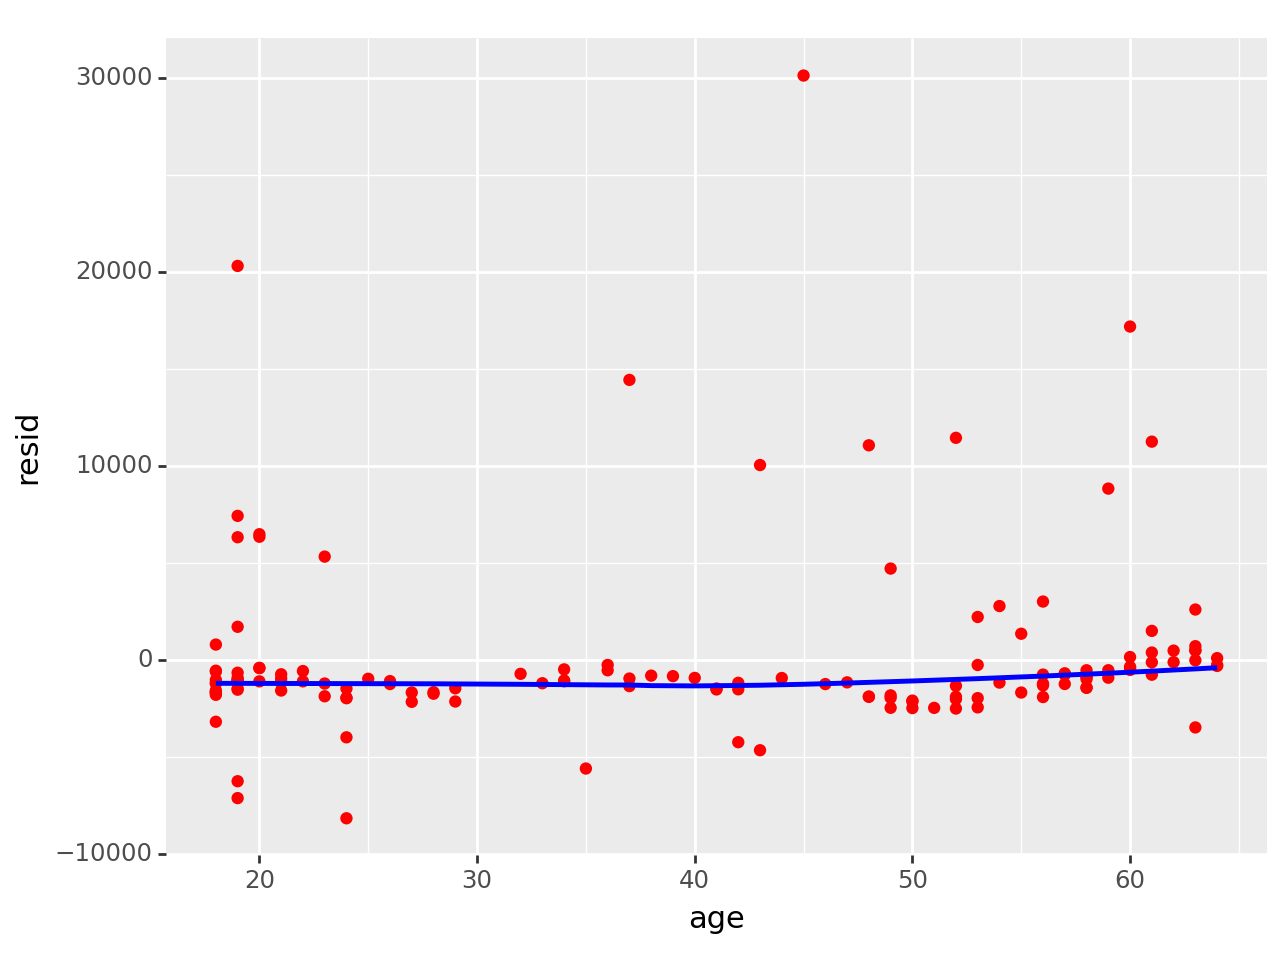

<Figure Size: (640 x 480)>

In [84]:
(ggplot(X)
    + geom_point(aes(x = 'age', y = 'resid'), color = 'red')
    + geom_smooth(aes(x = 'age', y = 'resid'), color = 'blue')
)

A model with age, bmi, and smoker with bmi and smoker interacting and the 8th polynomial of age seems to perform the best, although the improvements are minor